# Evaluation of the TSK model

In this notebook the tsk models are tested agains the train and test set from preliminary_analysis.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tsk_model import TSKModel
from pyfume import *
import time

In [2]:
expressions = {"P":"Precipitation", "E":"Potential evapotranspiration", "PB":"Precipation balance", "Tave":"Tave"}
#selected_features_custom = ["Relative_yield_change", "Latitude", "Tmax", "Tmin", "Longitude"]
#selected_features_pyfume = ["Latitude", "Tmax", "Tmin", "Longitude", "Relative_yield_change"]
#selected_features = ['Relative_yield_change','yield_of_CT', 'Latitude', 'Longitude',
#       'Years_since_CT_started', 'Crop_rotation_CT', 'Crop_rotation_NT', 'ST',
#       'Soil_cover_in_CT', 'Soil_cover_in_CT', 'Weed_pest_control_CT',
#       'Weed_pest_control_NT', 'P', 'E', 'PB', 'Tave', 'Tmax', 'Tmin']

# Note that we need copies of the datasets since the two models require different column ordering.
selected_features_custom = ["Relative_yield_change", 'yield_of_CT', "Tmax", "Tmin"]
selected_features_pyfume = ['yield_of_CT', "Tmax", "Tmin", "Relative_yield_change"]
train_data_custom = pd.read_csv("dataset/matlab_1_train.csv")[selected_features_custom]
test_data_custom = pd.read_csv("dataset/matlab_1_test.csv")[selected_features_custom]
train_data_pyfume = pd.read_csv("dataset/matlab_1_train.csv")[selected_features_pyfume]
test_data_pyfume = pd.read_csv("dataset/matlab_1_test.csv")[selected_features_pyfume]

Definition of test parameters

In [3]:
cluster_numbers = [2, 3, 4, 5, 6, 7, 8, 9, 10]
quantile_numbers = [0.2, 0.4, 0.6]
n_runs = 20

In [4]:
test_data_pyfume 

,yield_of_CT,Tmax,Tmin,Relative_yield_change
0,7900.0,26.45092,2.04168,-0.0759
1,11756.0,31.98261,-5.42037,-0.1007
2,6220.0,29.34542,16.69589,0.0492
3,6407.0,25.88517,12.58576,-0.0924
4,11240.0,26.37735,2.80240,-0.2278
...,...,...,...,...
243,6200.0,31.54964,-0.20791,0.0000
244,2486.0,30.64233,15.96019,-0.0760
245,4579.0,33.81494,5.66872,0.2466
246,14300.0,24.55087,5.82546,-0.2594


In [5]:
cur_tsk_model = TSKModel()
cur_tsk_model.create_rulebase_kmeans(train_data_custom, n_fuzzy_sets=3, expressions=expressions, trap_quantile=0.5)
print(cur_tsk_model.calculate_rmse(train_data_custom))

0.20752960204280402


In [6]:
cur_tsk_model.calculate_rmse(train_data_custom+1)

1.01574147984159

In [7]:
cluster_list_pyfume_training = [[] for n_sets in cluster_numbers]
cluster_list_pyfume_test = [[] for n_sets in cluster_numbers]
pyfume_timer = time.time()
for run in range(n_runs):
     print(f"Starting run {run}")
     cur_clusters_pyfume = {}
     cur_clusters_custom = {}
     for i, n_fuzzy_sets in enumerate(cluster_numbers):
          print(f"n_sets = {n_fuzzy_sets}")
          FIS = pyFUME(dataframe=train_data_pyfume, nr_clus=n_fuzzy_sets)
          cur_model = FIS.get_model()
          cluster_list_pyfume_training[i].append(FIS.calculate_error(method="RMSE"))

          test = SugenoFISTester(model=cur_model, test_data=test_data_pyfume.iloc[:,:-1].to_numpy(), 
                                 variable_names=np.array(selected_features_pyfume[:-1], dtype='<U22'),
                                 golden_standard=test_data_pyfume.iloc[:,-1].to_numpy())
          cluster_list_pyfume_test[i].append(test.calculate_RMSE())
               
pyfume_timer = time.time() - pyfume_timer

Starting run 0
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6
n_sets = 7
n_sets = 8
n_sets = 9
n_sets = 10
Starting run 1
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6
n_sets = 7
n_sets = 8
n_sets = 9
n_sets = 10
Starting run 2
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6
n_sets = 7
n_sets = 8
n_sets = 9
n_sets = 10
Starting run 3
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6
n_sets = 7
n_sets = 8
n_sets = 9
n_sets = 10
Starting run 4
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6
n_sets = 7
n_sets = 8
n_sets = 9
n_sets = 10
Starting run 5
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6
n_sets = 7
n_sets = 8
n_sets = 9
n_sets = 10
Starting run 6
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6
n_sets = 7
n_sets = 8
n_sets = 9
n_sets = 10
Starting run 7
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6
n_sets = 7
n_sets = 8
n_sets = 9
n_sets = 10
Starting run 8
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6
n_sets = 7

In [8]:
cluster_list_custom_training = [[] for n_sets in cluster_numbers]
cluster_list_custom_test = [[] for n_sets in cluster_numbers]
for quantile_number in quantile_numbers:
     for i in range(len(cluster_numbers)):
          cluster_list_custom_training[i].append([])
          cluster_list_custom_test[i].append([])


custom_timer = time.time()
for run in range(n_runs):
     print(f"Starting run {run}")
     cur_clusters_pyfume = {}
     cur_clusters_custom = {}
     for i, n_fuzzy_sets in enumerate(cluster_numbers):
          print(f"n_sets = {n_fuzzy_sets}")
          for j, quantile_number in enumerate(quantile_numbers):
               cur_tsk_model = TSKModel()
               cur_tsk_model.create_rulebase_kmeans(train_data_custom, n_fuzzy_sets=n_fuzzy_sets, expressions=expressions, trap_quantile=quantile_number)
               cluster_list_custom_training[i][j].append(cur_tsk_model.calculate_rmse(train_data_custom))
               cluster_list_custom_test[i][j].append(cur_tsk_model.calculate_rmse(test_data_custom))
               
custom_timer = time.time() - custom_timer

Starting run 0
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 1
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 2
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 3
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 4
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 5
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 6
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 7
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 8
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 9
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 10
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 11
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 12
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 13
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 14
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 15
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 16
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 17
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 18
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Starting run 19
n_sets = 2
n_sets = 3
n_sets = 4
n_sets = 5
n_sets = 6


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 7


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 8


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 9


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


n_sets = 10


c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\b-mor\ACIT4620_XAI_with_ANFIS\anfis_env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [9]:
np.array(cluster_list_custom_training).shape


(9, 3, 20)

In [10]:
np.array(cluster_list_custom_test).shape

(9, 3, 20)

In [11]:
np.array(cluster_list_pyfume_training).shape

(9, 20)

In [12]:
np.array(cluster_list_pyfume_test).shape

(9, 20)

The model results are aggregated and cleaned up

In [13]:
log = {
    ("labels","n_sets") : [], 
    ("labels", "statistic_measures",) : [], 
    ("pyFume", "train_pyFume") : [], 
    ("pyFume", "test_pyFume") : [], 
    }
for q in quantile_numbers:
    log[("test_custom", f"q_{q}")] = []
    
for q in quantile_numbers:
    log[("train_custom", f"q_{q}")] = []

for i, cluster_number in enumerate(cluster_numbers):
    for name, measure in {"Min" : np.min, "Max" : np.max, "Std" : np.std, "Mean" : np.mean}.items():
        log[("labels", "n_sets")].append(cluster_number)
        log[("labels", "statistic_measures")].append(name)
        log[("pyFume", "train_pyFume")].append(measure(cluster_list_pyfume_training[i]))
        log[("pyFume", "test_pyFume")].append(measure(cluster_list_pyfume_test[i]))
        for j, q in enumerate(quantile_numbers):
            log[("train_custom", f"q_{q}")].append(measure(cluster_list_custom_training[i][j]))
            log[("test_custom", f"q_{q}")].append(measure(cluster_list_custom_test[i][j]))       


Printing results

In [14]:
results = pd.DataFrame(log)
print(f"Runtime for custom implementation: {custom_timer:.4f} s")
print(f"Runtime for pyFume implementation: {pyfume_timer:.4f} s")
print(f"Number of runs per parameterset: {n_runs}")
results[["pyFume", "test_custom", "train_custom"]].set_index(pd.MultiIndex.from_frame(results["labels"]))

Runtime for custom implementation: 484.0734 s
Runtime for pyFume implementation: 311.1125 s
Number of runs per parameterset: 20


pyFume             test_custom                \
                          train_pyFume test_pyFume       q_0.2         q_0.4   
n_sets statistic_measures                                                      
2      Min                    0.190334    0.220855    0.220846  2.208354e-01   
       Max                    0.228402    0.222151    0.221092  2.210915e-01   
       Std                    0.008754    0.000368    0.000053  5.366673e-05   
       Mean                   0.208881    0.221612    0.220858  2.208578e-01   
3      Min                    0.185669    0.220621    0.219904  2.199038e-01   
       Max                    0.223902    0.222152    0.219970  2.199699e-01   
       Std                    0.010137    0.000378    0.000032  3.235729e-05   
       Mean                   0.207419    0.221509    0.219930  2.199302e-01   
4      Min                    0.183946    0.218508    0.218524  2.185244e-01   
       Max                    0.225969    0.222438    0.218670  2.185244e-01   
       Std                    0.011635    0.000923    0.000032  2.775558e-17   
       Mean                   0.209857    0.220260    0.218532  2.185244e-01   
5      Min                    0.186807    0.217730    0.217798  2.177983e-01   
       Max                    0.226175    0.221652    0.220033  2.201375e-01   
       Std                    0.011454    0.000978    0.000785  7.082101e-04   
       Mean                   0.204708    0.218922    0.218873  2.193209e-01   
6      Min                    0.178773    0.216658    0.217663  2.176631e-01   
       Max                    0.241952    0.220355    0.220747  2.207474e-01   
       Std                    0.013910    0.001020    0.001052  1.057408e-03   
       Mean                   0.209563    0.218721    0.218841  2.189571e-01   
7      Min                    0.184820    0.214752    0.220373  2.203734e-01   
       Max                    0.246154    0.227994    0.222470  2.233517e-01   
       Std                    0.013801    0.003670    0.000785  9.011077e-04   
       Mean                   0.209872    0.218833    0.221575  2.214646e-01   
8      Min                    0.177162    0.214692    0.221933  2.218795e-01   
       Max                   14.514819    0.263244    0.222482  2.221792e-01   
       Std                    3.117286    0.010366    0.000188  7.520020e-05   
       Mean                   0.927078    0.220376    0.222099  2.220254e-01   
9      Min                    0.184482    0.214893    0.219791  2.205964e-01   
       Max                    0.341703    0.245087    0.223644  2.251200e-01   
       Std                    0.031508    0.006536    0.000977  9.813434e-04   
       Mean                   0.211527    0.219088    0.221606  2.218643e-01   
10     Min                    0.194483    0.212728    0.220972  2.205621e-01   
       Max                    0.219353    0.243624    0.225680  2.258767e-01   
       Std                    0.006813    0.006674    0.001372  1.195948e-03   
       Mean                   0.207864    0.219330    0.222542  2.223519e-01   

                                    train_custom                          
                              q_0.6        q_0.2         q_0.4     q_0.6  
n_sets statistic_measures                                                 
2      Min                 0.220835     0.208826  2.088259e-01  0.208765  
       Max                 0.221514     0.208842  2.088485e-01  0.208881  
       Std                 0.000197     0.000003  3.810409e-06  0.000020  
       Mean                0.220936     0.208841  2.088412e-01  0.208838  
3      Min                 0.219904     0.207530  2.075296e-01  0.207530  
       Max                 0.219970     0.207648  2.076476e-01  0.207648  
       Std                 0.000032     0.000058  5.782320e-05  0.000056  
       Mean                0.219927     0.207577  2.075768e-01  0.207571  
4      Min                 0.218379     0.206369  2.065190e-01  0.206354  
       Max 

In [15]:
results[["pyFume", "test_custom", "train_custom"]].set_index(pd.MultiIndex.from_frame(results["labels"])).to_csv("first_results.csv", float_format="%.5f")
results.to_csv("first_results_raw.csv")

In [16]:
results[["pyFume", "test_custom", "train_custom"]].columns.to_numpy()

array([('pyFume', 'train_pyFume'), ('pyFume', 'test_pyFume'),
       ('test_custom', 'q_0.2'), ('test_custom', 'q_0.4'),
       ('test_custom', 'q_0.6'), ('train_custom', 'q_0.2'),
       ('train_custom', 'q_0.4'), ('train_custom', 'q_0.6')], dtype=object)

In [17]:
results = pd.read_csv("first_results.csv")

KeyError: 'labels'

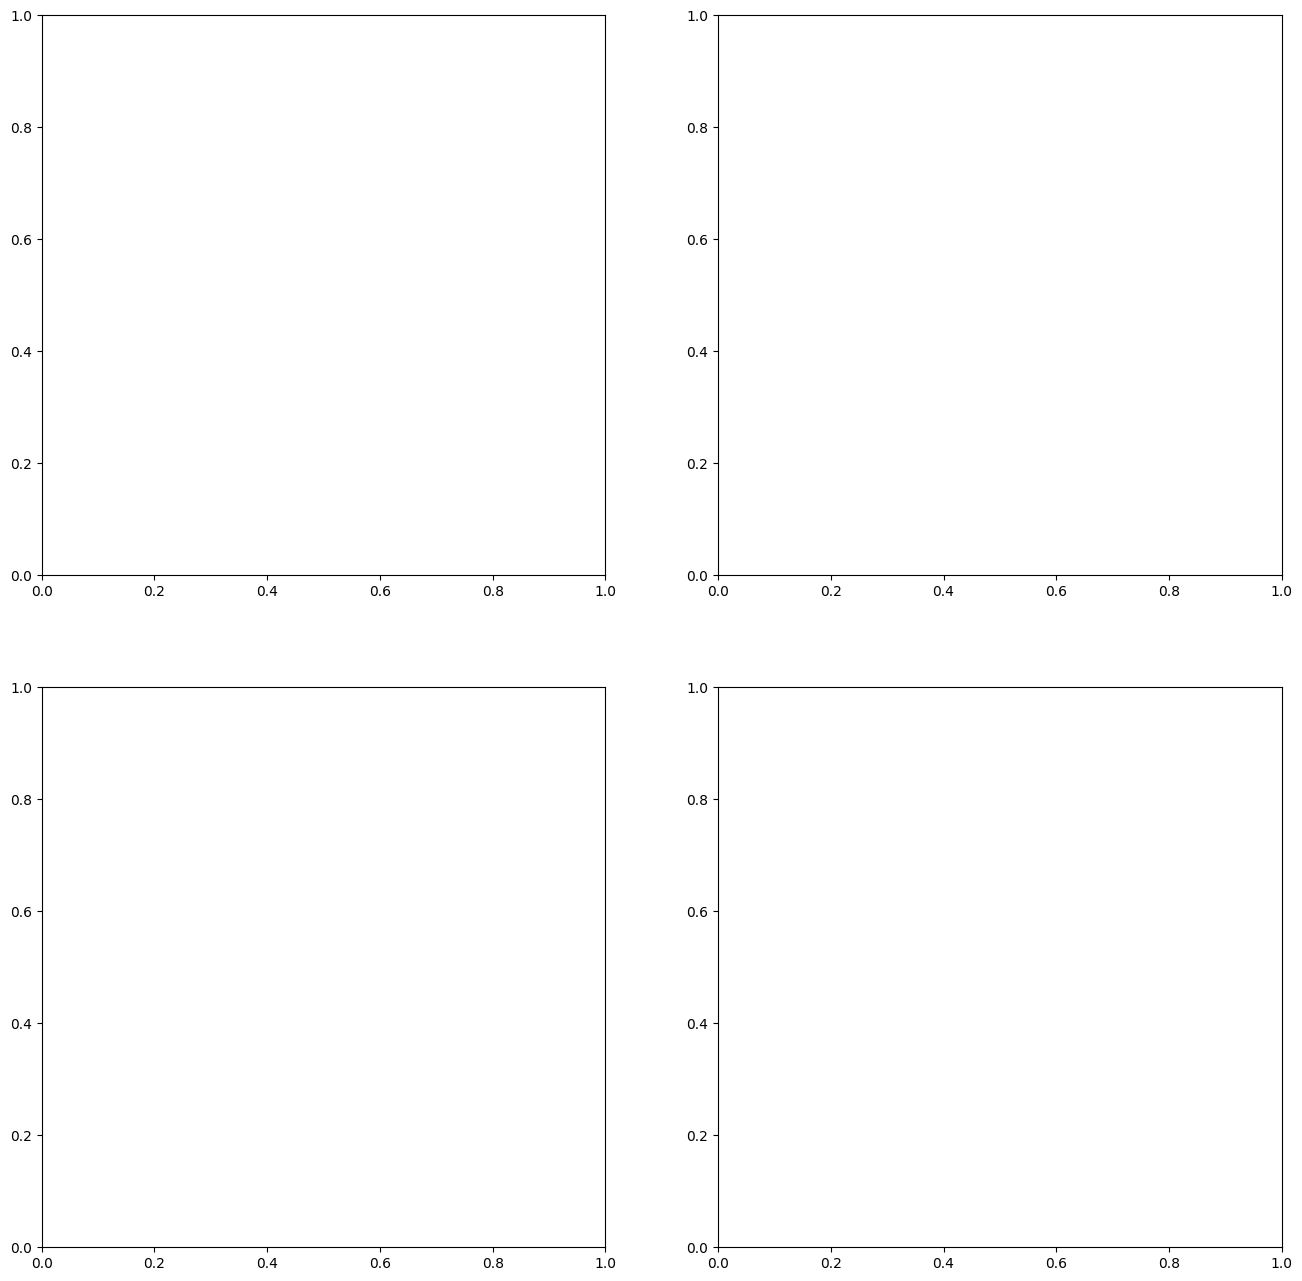

In [18]:
fig, axes = plt.subplots(2,2, figsize=(16, 16))
measure_list = results["labels"]["statistic_measures"].unique()
for i, measure_label in enumerate(measure_list):
    cur_axis = axes[int(i/(len(measure_list)/2)),int(i%(len(measure_list)/2))]
    cur_axis.set_title(f"{measure_label} RMSE for a given number of sets")
    cur_axis.set_xlabel(f"Number of fuzzy sets")
    cur_axis.set_ylabel(f"{measure_label} RMSE")
    for parent, column in results[["pyFume", "test_custom", "train_custom"]].columns.to_numpy():
        cur_y = results[results["labels"]["statistic_measures"] == measure_label][parent][column]
        cur_x = results[results["labels"]["statistic_measures"] == measure_label]["labels"]["n_sets"]
        cur_axis.plot(cur_x, cur_y, label=f"{parent}_{column}")

    cur_axis.legend()